<a href="https://colab.research.google.com/github/sruthi-v04/MIRnet_bigimage/blob/main/MIRNET_bigPicture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from huggingface_hub import from_pretrained_keras
import keras
from PIL import Image

In [ ]:
import cv2

def get_image_size(image_path):

    image = cv2.imread(image_path)


    height, width = image.shape[:2]

    return width, height
input_image_path = "/content/low light big pic.jpg"


width, height = get_image_size(input_image_path)
print("Original Image Size: {}x{}".format(width, height))


Original Image Size: 4000x5999


In [ ]:
original_image = cv2.imread(input_image_path)

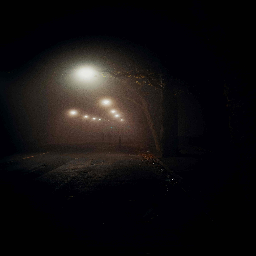

In [ ]:
from google.colab.patches import cv2_imshow

target_size = (256, 256)
resized_image = cv2.resize(original_image, target_size)


input_image = resized_image.astype('float32') / 255.0

cv2_imshow(resized_image)


In [ ]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

demo.png:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

model.png:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

(…)fevents.1645062781.9310af7fd322.357.0.v2:   0%|          | 0.00/481k [00:00<?, ?B/s]

(…)fevents.1645063719.e472ca747184.299.0.v2:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

variables/variables.index:   0%|          | 0.00/219k [00:00<?, ?B/s]

(…)fevents.1645063841.e472ca747184.299.1.v2:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

keras_metadata.pb:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

saved_model.pb:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

variables.data-00000-of-00001:   0%|          | 0.00/437M [00:00<?, ?B/s]

In [ ]:
image = keras.preprocessing.image.img_to_array(resized_image)

In [ ]:
image.shape

(256, 256, 3)

In [ ]:
image = image.astype('float32') / 255.0
image.shape

(256, 256, 3)

In [ ]:
image = np.expand_dims(image, axis = 0)

In [ ]:
image.shape

(1, 256, 256, 3)

In [ ]:
output = model.predict(image)

1/1 [==============================] - 24s 24s/step


In [ ]:
output_image = output[0] * 255.0

In [ ]:
output_image.shape

(256, 256, 3)

In [ ]:
output_image = output_image.clip(0,255)

In [ ]:
output_image.shape

(256, 256, 3)

In [ ]:
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

In [ ]:
output_image

array([[[42.083088, 41.70669 , 34.62174 ],
        [51.28514 , 51.584316, 47.85105 ],
        [47.74341 , 57.96553 , 49.404152],
        ...,
        [50.215576, 56.9787  , 46.801258],
        [50.523933, 53.012463, 43.634327],
        [37.679535, 36.288635, 35.16632 ]],

       [[48.37434 , 42.972496, 46.52423 ],
        [63.109394, 52.3318  , 53.71969 ],
        [54.330116, 54.031555, 47.598007],
        ...,
        [51.482655, 53.100807, 43.289207],
        [57.228157, 55.701305, 48.242317],
        [49.71574 , 46.094437, 43.10819 ]],

       [[48.523045, 39.370686, 42.646835],
        [62.38773 , 48.648293, 46.528957],
        [49.887714, 45.552845, 39.89376 ],
        ...,
        [44.391785, 41.144356, 38.680416],
        [52.295254, 45.812366, 47.552402],
        [49.27655 , 46.431454, 44.49715 ]],

       ...,

       [[49.02298 , 47.042435, 39.171764],
        [61.692368, 54.172268, 41.066704],
        [52.619602, 49.645493, 35.46491 ],
        ...,
        [46.68546 , 37.540

In [ ]:
output_image = np.uint32(output_image)

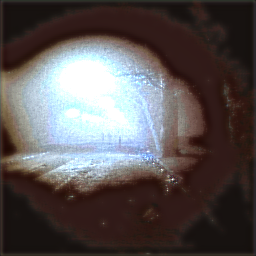

In [ ]:
Image.fromarray(output_image.astype('uint8'),'RGB')